In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#define DataFrame variable that contains the data
df = pd.read_csv('student.csv')
df.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
len(df)

1000

In [5]:
df.shape

(1000, 8)

In [6]:
df.columns.values

array(['gender', 'ethnicity', 'parental_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'], dtype=object)

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df['ethnicity'].value_counts()

,count
ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [16]:
df['gender'].value_counts(normalize=True)

,proportion
gender,
female,0.518
male,0.482


In [17]:
df['parental_education'].value_counts(normalize=True)

,proportion
parental_education,
some college,0.226
associate's degree,0.222
high school,0.196
some high school,0.179
bachelor's degree,0.118
master's degree,0.059


In [18]:
df['lunch'].value_counts()

,count
lunch,
standard,645
free/reduced,355


In [19]:
df['lunch'].value_counts(normalize=True)

,proportion
lunch,
standard,0.645
free/reduced,0.355


In [20]:
df['math_score'].value_counts(bins=5)

,count
"(60.0, 80.0]",485
"(40.0, 60.0]",289
"(80.0, 100.0]",176
"(20.0, 40.0]",46
"(-0.101, 20.0]",4


In [21]:
df['reading_score'].value_counts(bins=6)

,count
"(58.5, 72.333]",330
"(72.333, 86.167]",320
"(44.667, 58.5]",184
"(86.167, 100.0]",113
"(30.833, 44.667]",45
"(16.916, 30.833]",8


In [22]:
reading_score_bins = df['reading_score'].value_counts(bins=6)

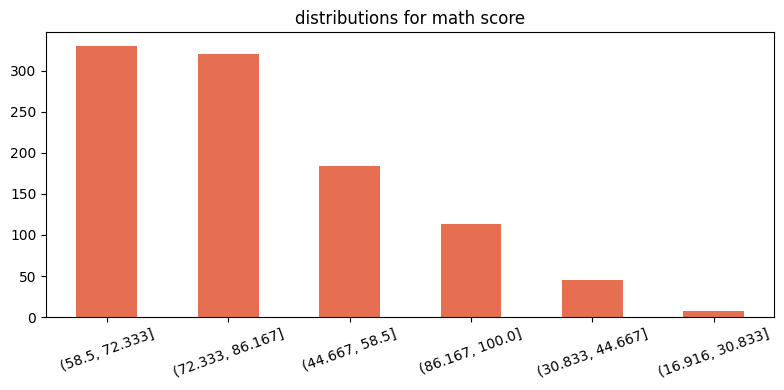

In [24]:
# Visualize the value_counts results using bar chart.

plt.figure(figsize=(8,4))
reading_score_bins.plot(kind='bar', color='#e76f51')
plt.xticks(rotation=20)
plt.title('distributions for math score')
plt.tight_layout()
plt.show()

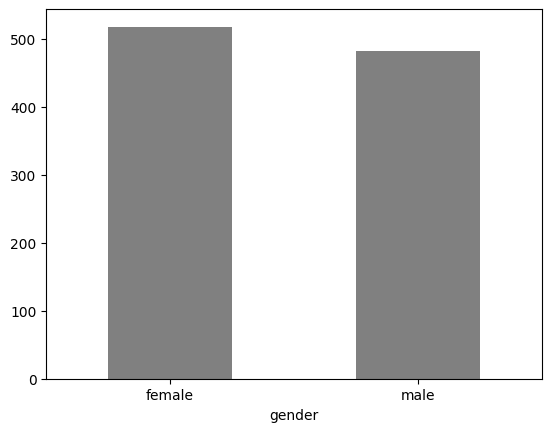

In [25]:
gender_bar_chart = df['gender'].value_counts()
gender_bar_chart.plot(kind='bar', color='grey')
plt.xticks(rotation=0)
plt.show()

In [26]:
# Define 2d contingency table

contingency_table = pd.crosstab(df['parental_education'],df['gender'])
contingency_table

gender,female,male
parental_education,,
associate's degree,116,106
bachelor's degree,63,55
high school,94,102
master's degree,36,23
some college,118,108
some high school,91,88


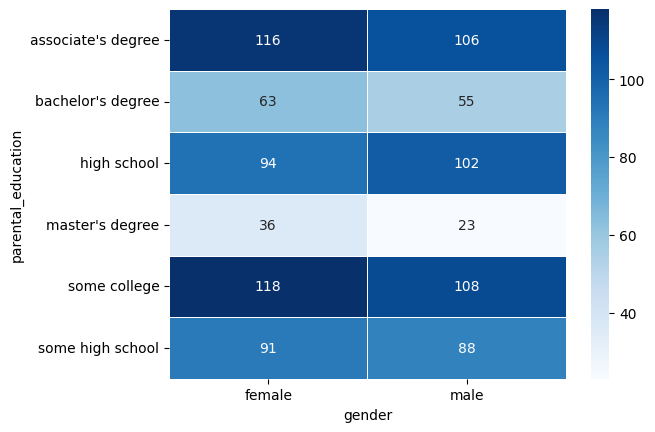

In [28]:
# Visualize the contingency_table

sns.heatmap(contingency_table, cmap='Blues', annot=True, fmt='d', linewidths=0.5)
plt.show()

In [29]:
percentage_table = contingency_table/1000*100
percentage_table

gender,female,male
parental_education,,
associate's degree,11.6,10.6
bachelor's degree,6.3,5.5
high school,9.4,10.2
master's degree,3.6,2.3
some college,11.8,10.8
some high school,9.1,8.8


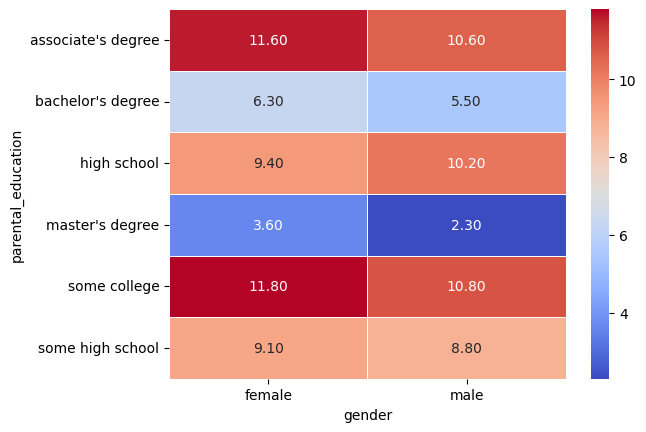

In [30]:
sns.heatmap(percentage_table, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.show()

In [31]:
new_table = pd.crosstab(df['parental_education'], df['ethnicity'])
new_table

ethnicity,group A,group B,group C,group D,group E
parental_education,,,,,
associate's degree,14,41,78,50,39
bachelor's degree,12,20,40,28,18
high school,18,48,64,44,22
master's degree,3,6,19,23,8
some college,18,37,69,67,35
some high school,24,38,49,50,18


In [32]:
new_pct_table = new_table/1000*100
new_pct_table

ethnicity,group A,group B,group C,group D,group E
parental_education,,,,,
associate's degree,1.4,4.1,7.8,5.0,3.9
bachelor's degree,1.2,2.0,4.0,2.8,1.8
high school,1.8,4.8,6.4,4.4,2.2
master's degree,0.3,0.6,1.9,2.3,0.8
some college,1.8,3.7,6.9,6.7,3.5
some high school,2.4,3.8,4.9,5.0,1.8


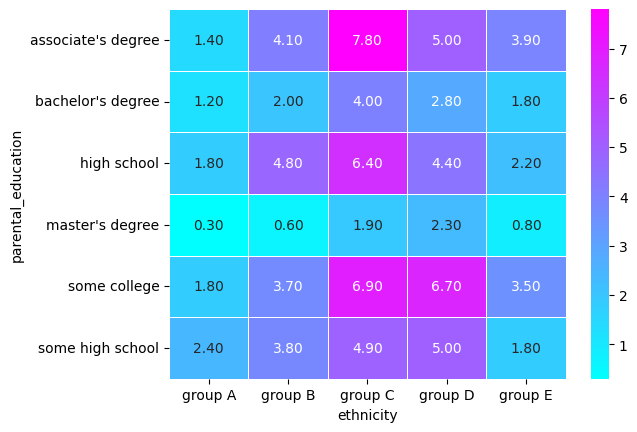

In [33]:
sns.heatmap(new_pct_table, cmap='cool', fmt='.2f', linewidth=0.5, annot=True)
plt.show()

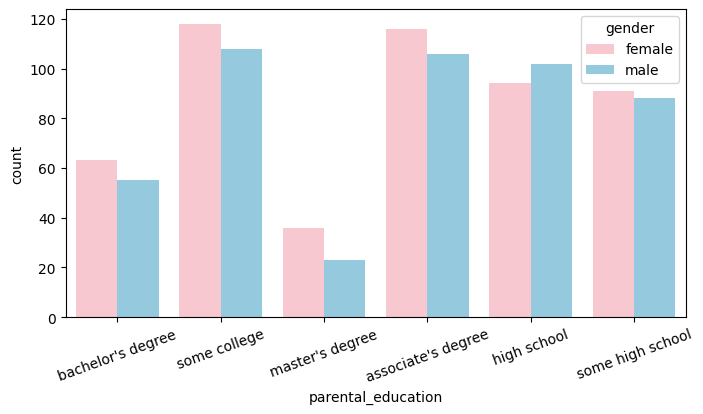

In [34]:
# Create a bar chart showing the distribution of parental_education

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='parental_education', hue='gender',
              palette={'female':'pink', 'male':'skyblue'})
plt.xticks(rotation=20)
plt.show()

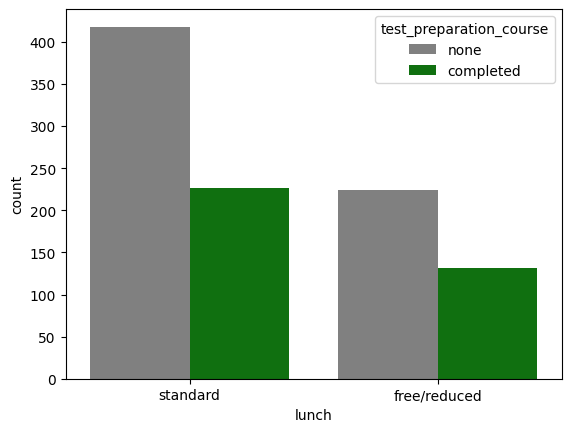

In [35]:
sns.countplot(data=df, x='lunch', hue='test_preparation_course',
              palette={'none':'grey', 'completed':'green'})
plt.show()